# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [41]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt

In [42]:
online_rt = pd.read_csv('Online_Retail.csv', encoding= 'latin1')
online_rt.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

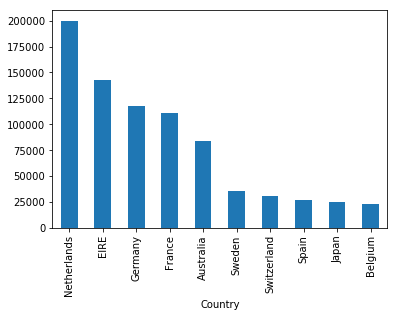

In [43]:
h1 = online_rt.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
h2 = h1[1:11]
h2.plot(kind = 'bar')
plt.show()

### Step 5.  Exclude negative Quatity entries

In [44]:
online_rt = online_rt[online_rt['Quantity'] > 0]
online_rt.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [53]:
s1 = online_rt.loc[online_rt['Country'] == 'Germany']
s2 = online_rt.loc[online_rt['Country'] == 'Netherlands']
s3 = online_rt.loc[online_rt['Country'] == 'EIRE']
s = pd.concat([s1, s2, s3])

In [54]:
s3 = s.groupby(['Country', 'CustomerID']).sum()
s3.reset_index(level=0, inplace=True)
s3.head()

Country  Quantity  UnitPrice
CustomerID                              
14016.0        EIRE      2125     635.88
14156.0        EIRE     57885    5357.68
14911.0        EIRE     80515   26185.72
12426.0     Germany       258     118.09
12427.0     Germany       533     142.26

In [55]:
s3.Country.unique()

array(['EIRE', 'Germany', 'Netherlands'], dtype=object)

In [56]:
import seaborn as sns

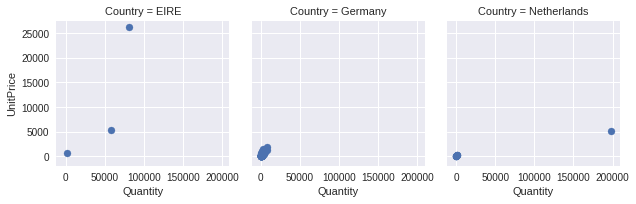

In [64]:
x = sns.FacetGrid(data = s3, col = 'Country')
x = x.map(plt.scatter, 'Quantity', 'UnitPrice')

### BONUS: Create your own question and answer it.